# Modelagem Estatística - Doenças Cardiovascilares 

### Definindo o Problema

A Organização Mundial de Saúde estima que 12 milhões de mortes ocorrem em todo o mundo, todos os anos devido a doenças cardíacas. Metade das mortes nos Estados Unidos e em outros países desenvolvidos se deve a doenças cardiovasculares. O prognóstico precoce de doenças cardiovasculares pode ajudar na tomada de decisões sobre mudanças no estilo de vida em pacientes de alto risco e, por sua vez, reduzir as complicações. Esta análise pretende identificar os fatores de risco mais relevantes para doenças cardíacas.

Framingham Heart Study

https://datacatalog.med.nyu.edu/dataset/10046

O Framingham Heart Study (FHS) é dedicado à identificação de fatores ou características comuns que contribuem para doenças cardiovasculares. Em 1948, uma amostra de 5.209 homens e mulheres entre 30 e 62 anos foi recrutada em Framingham, Massachusetts para o estudo. Outras amostras foram coletadas em 1971, 1994, 2002 e 2004. A pesquisa principal do conjunto de dados concentra-se em doenças cardiovasculares. Os dados incluem amostras biológicas, dados genéticos moleculares, dados de fenótipo, imagens, dados de funcionamento vascular do participante, dados fisiológicos, dados demográficos e dados de ECG. É um projeto colaborativo do National Heart, Lung and Blood Institute e Universidade de Boston.

O conjunto de dados fornece as informações dos pacientes. Cada atributo é um fator de risco potencial. Existem fatores de risco demográficos, comportamentais e médicos.

**O objetivo do projeto é analisar a relação das variáveis preditoras com a variável alvo, pacientes que tiveram ou não doenças cardiovasculares! E responder a seguinte pergunta: Quais fatores mais contribuem para que um paciente venha a desenvolver doenças cardiovasculares em um período de 10 anos?**

Para compreender mais sobre o problema, acesse:

https://www.who.int/en/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

## 01 - CARREGANDO E IDENTIFICANDO OS DADOS

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy             as np
import pandas            as pd
import sklearn           as sk
import seaborn           as sns
import imblearn          as im
import tensorflow        as tf
import matplotlib        as m
import scipy.stats       as ss
import matplotlib.mlab   as mlab
import statsmodels.api   as sm
import matplotlib.pyplot as plt

from sklearn.metrics           import confusion_matrix, classification_report
from pandas.api.types          import is_string_dtype
from pandas.api.types          import is_numeric_dtype
from statsmodels.tools         import add_constant as add_constant
from sklearn.preprocessing     import MinMaxScaler
from imblearn.over_sampling    import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

%matplotlib inline

In [2]:
# Carregando os dados
df_pacientes = pd.read_csv("dados/pacientes.csv")
df_pacientes.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**ATRIBUTOS**

Demográfico:

- Sex: masculino ou feminino (variável categórica)
- Age: idade do paciente (variável numérica)
- Education: nenhuma informação adicional é fornecida (variável categórica)

Comportamental:

- Current Smoker: se o paciente é ou não fumante atual (variável categórica)
- Cigs Per Day: o número de cigarros que a pessoa fumava em média em um dia (variável numérica)

Informações sobre histórico médico:

- BP Meds: se o paciente estava ou não fazendo uso de medicamentos para pressão arterial (variável categórica)
- Prevalent Stroke: se o paciente já teve ou não um AVC (variável categórica)
- Prevalent Hyp: se o paciente era ou não hipertenso (variável categórica)
- Diabetes: se o paciente teve ou não diabetes (variável categórica)

Informações sobre a condição médica atual:

- Tot Chol: nível total de colesterol (variável numérica)
- Sys BP: pressão arterial sistólica (variável numérica)
- Dia BP: pressão arterial diastólica  (variável numérica)
- BMI: Índice de Massa Corporal (variável numérica)
- Heart Rate: frequência cardíaca (variável numérica)
- Glucose: nível de glicose (variável numérica)

Variável de destino:

- TenYearCHD - Risco de 10 anos de doença cardíaca coronária (CHD - Coronary Heart Disease ) - (binário: "1" significa "Sim", "0" significa "Não")


Referências:

https://www.diferenca.com/sistole-e-diastole/

https://www.minhavida.com.br/saude/materias/18184-quais-os-sintomas-de-glicose-alta-no-sangue

https://www.minhavida.com.br/saude/temas/colesterol

## 02 - ANÁLISE EXPLORATÓRIA E LIMPEZA DOS DADOS

In [3]:
# Shape
df_pacientes.shape

(4240, 16)

In [4]:
# Tipos de Dados
df_pacientes.dtypes

sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
# Verificando registros duplicados
df_pacientes[df_pacientes.duplicated()]

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [6]:
# Verificando se temos valores ausentes
# Total por variável
df_pacientes.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# Verificando se temos valores ausentes
# Mostrando os valores
dataset_NAN = df_pacientes[df_pacientes.isnull().any(axis = 1)]
dataset_NAN

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [8]:
# Verificando o percentual de valores ausentes no dataset

# Contador
contador = 0

# Loop pelos valores nulos
for i in df_pacientes.isnull().sum(axis = 1):
    if i > 0:
        contador = contador + 1

print('Número Total de Linhas no Dataset:', df_pacientes.shape[0])
print('Número Total de Linhas com Valores Ausentes:', contador)
print('Percentual de Valores Ausentes no Dataset:', round((contador/len(df_pacientes.index)) * 100), '%')

Número Total de Linhas no Dataset: 4240
Número Total de Linhas com Valores Ausentes: 582
Percentual de Valores Ausentes no Dataset: 14 %


In [9]:
# Coleta estatísticas das colunas
df_pacientes.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(df_pacientes, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        df_pacientes[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')
        
    fig.tight_layout()  
    plt.show()

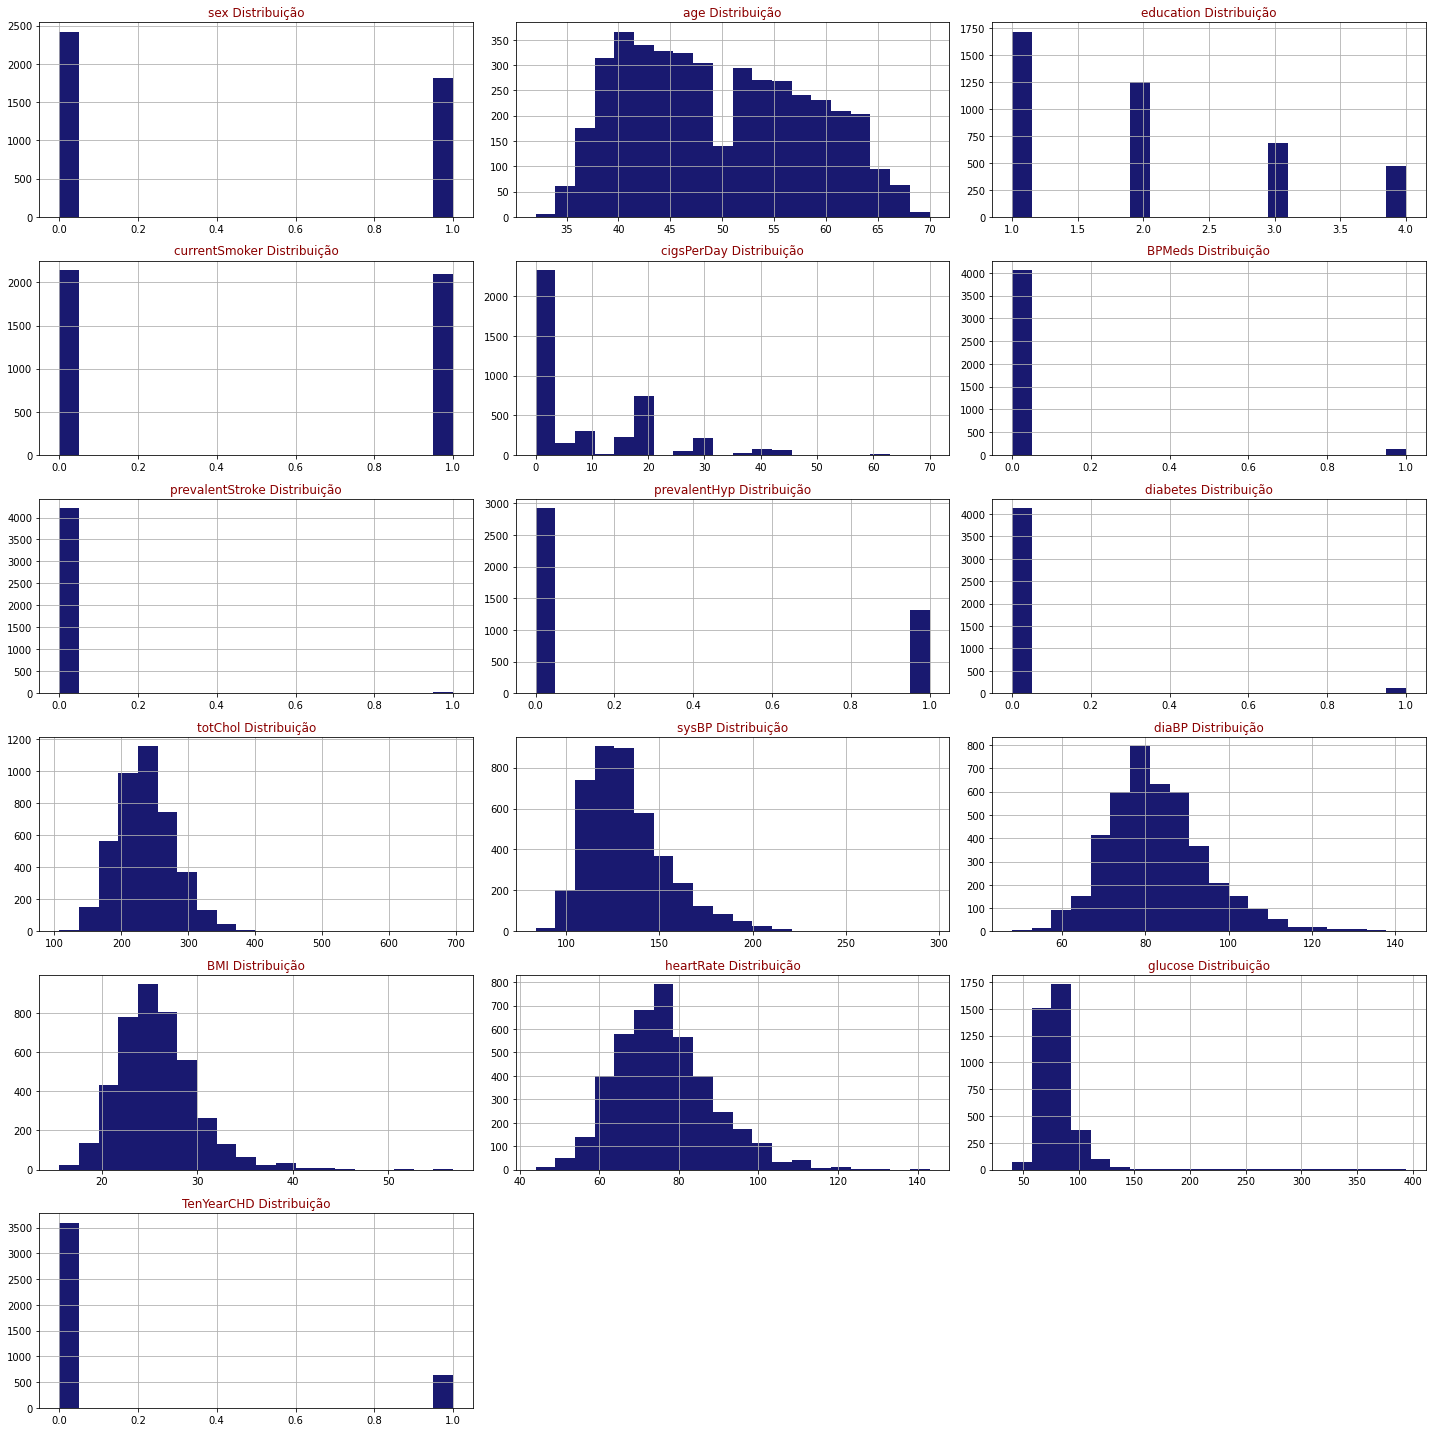

In [11]:
# Executa a função
cria_histograma(df_pacientes, df_pacientes.columns, 6, 3)

<AxesSubplot:>

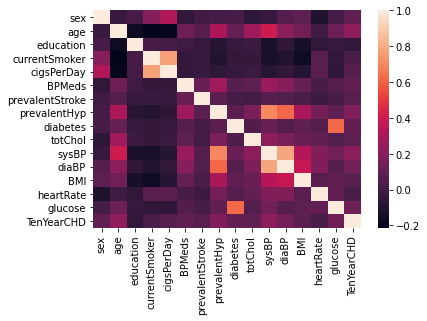

In [12]:
# Verificando a Correlação
df_pacientes_corr = df_pacientes.corr()
sns.heatmap(df_pacientes_corr)

In [13]:
# Criando uma cópia do dataset original
df_pacientes_teste = df_pacientes.copy()

In [14]:
# Cópia do dataset
df_pacientes_teste.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
# Convertendo as variáveis categóricas para o tipo categórico em Python
# Como queremos apenas avaliar a associação com a variável resposta estamos trabalhando com uma cópia do dataset original.
df_pacientes_teste['sex'] = df_pacientes_teste['sex'].astype('category')
df_pacientes_teste['education'] = df_pacientes_teste['education'].astype('category')
df_pacientes_teste['currentSmoker'] = df_pacientes_teste['currentSmoker'].astype('category')
df_pacientes_teste['BPMeds'] = df_pacientes_teste['BPMeds'].astype('category')
df_pacientes_teste['prevalentStroke'] = df_pacientes_teste['prevalentStroke'].astype('category')
df_pacientes_teste['prevalentHyp'] = df_pacientes_teste['prevalentHyp'].astype('category')
df_pacientes_teste['diabetes'] = df_pacientes_teste['diabetes'].astype('category')
df_pacientes_teste['TenYearCHD'] = df_pacientes_teste['TenYearCHD'].astype('category')

In [16]:
# Visualizando os tipos de dados
df_pacientes_teste.dtypes

sex                category
age                   int64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object

In [17]:
# Verificando detalhes sobre os tipos de dados
df_pacientes_teste.dtypes.values

array([CategoricalDtype(categories=[0, 1], ordered=False), dtype('int64'),
       CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False),
       CategoricalDtype(categories=[0, 1], ordered=False),
       dtype('float64'),
       CategoricalDtype(categories=[0.0, 1.0], ordered=False),
       CategoricalDtype(categories=[0, 1], ordered=False),
       CategoricalDtype(categories=[0, 1], ordered=False),
       CategoricalDtype(categories=[0, 1], ordered=False),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       CategoricalDtype(categories=[0, 1], ordered=False)], dtype=object)

<AxesSubplot:>

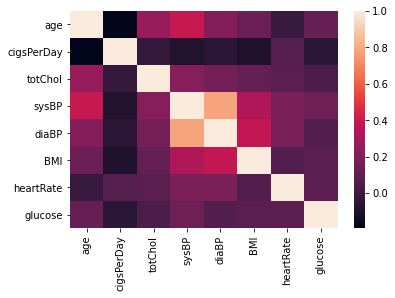

In [18]:
# Coeficiente de correlação é calculado para variáveis numéricas
df_pacientes_corr = df_pacientes_teste.corr()
sns.heatmap(df_pacientes_corr)

In [19]:
# Função para calcular a associação entre variáveis categóricas

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [20]:
# Coleta as variáveis categóricas do dataset

categorical_vars = []

for column in df_pacientes_teste:
    if is_string_dtype(df_pacientes_teste[column]):
        categorical_vars.append(column)

In [21]:
categorical_vars

[]

In [22]:
y = 'TenYearCHD'

print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(df_pacientes_teste[var], df_pacientes_teste[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.




Removeremos do dataset a coluna education. Primeiro porque ela não tem correlação (associação) com a variável resposta e segundo porque usar a educação para compreender fatores de risco poderia ser algo subjetivo. Além de tudo isso, não temos mais detalhes sobre essa variável. Manteremos as demais variáveis por enquanto.

### 2.1 - Tratamento de Valores Ausentes

In [23]:
# Removendo a coluna education
df_pacientes = df_pacientes.drop(['education'], axis = 1)

In [24]:
df_pacientes.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [25]:
# Verificando o percentual de valores ausentes no dataset

# Contador
contador = 0

# Loop pelos valores nulos
for i in df_pacientes.isnull().sum(axis = 1):
    if i > 0:
        contador = contador + 1

print('Número Total de Linhas no Dataset:', df_pacientes.shape[0])
print('Número Total de Linhas com Valores Ausentes:', contador)
print('Percentual de Valores Ausentes no Dataset:', round((contador/len(df_pacientes.index)) * 100), '%')

Número Total de Linhas no Dataset: 4240
Número Total de Linhas com Valores Ausentes: 489
Percentual de Valores Ausentes no Dataset: 12 %


In [26]:
# Verificando o Total de valores ausentes por variável
df_pacientes.isnull().sum()

sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [27]:
df_pacientes.describe()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [28]:
# Removendo todas as linhas com valores NA
df_pacientes = df_pacientes.dropna()
df_pacientes.isna().sum()

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [29]:
# Verificando o percentual de valores ausentes no dataset

# Contador
contador = 0

# Loop pelos valores nulos
for i in df_pacientes.isnull().sum(axis = 1):
    if i > 0:
        contador = contador + 1

print('Número Total de Linhas no Dataset:', df_pacientes.shape[0])
print('Número Total de Linhas com Valores Ausentes:', contador)
print('Percentual de Valores Ausentes no Dataset:', round((contador/len(df_pacientes.index)) * 100), '%')

Número Total de Linhas no Dataset: 3751
Número Total de Linhas com Valores Ausentes: 0
Percentual de Valores Ausentes no Dataset: 0 %


### 2.2 - Tratamento de Valores Outliers

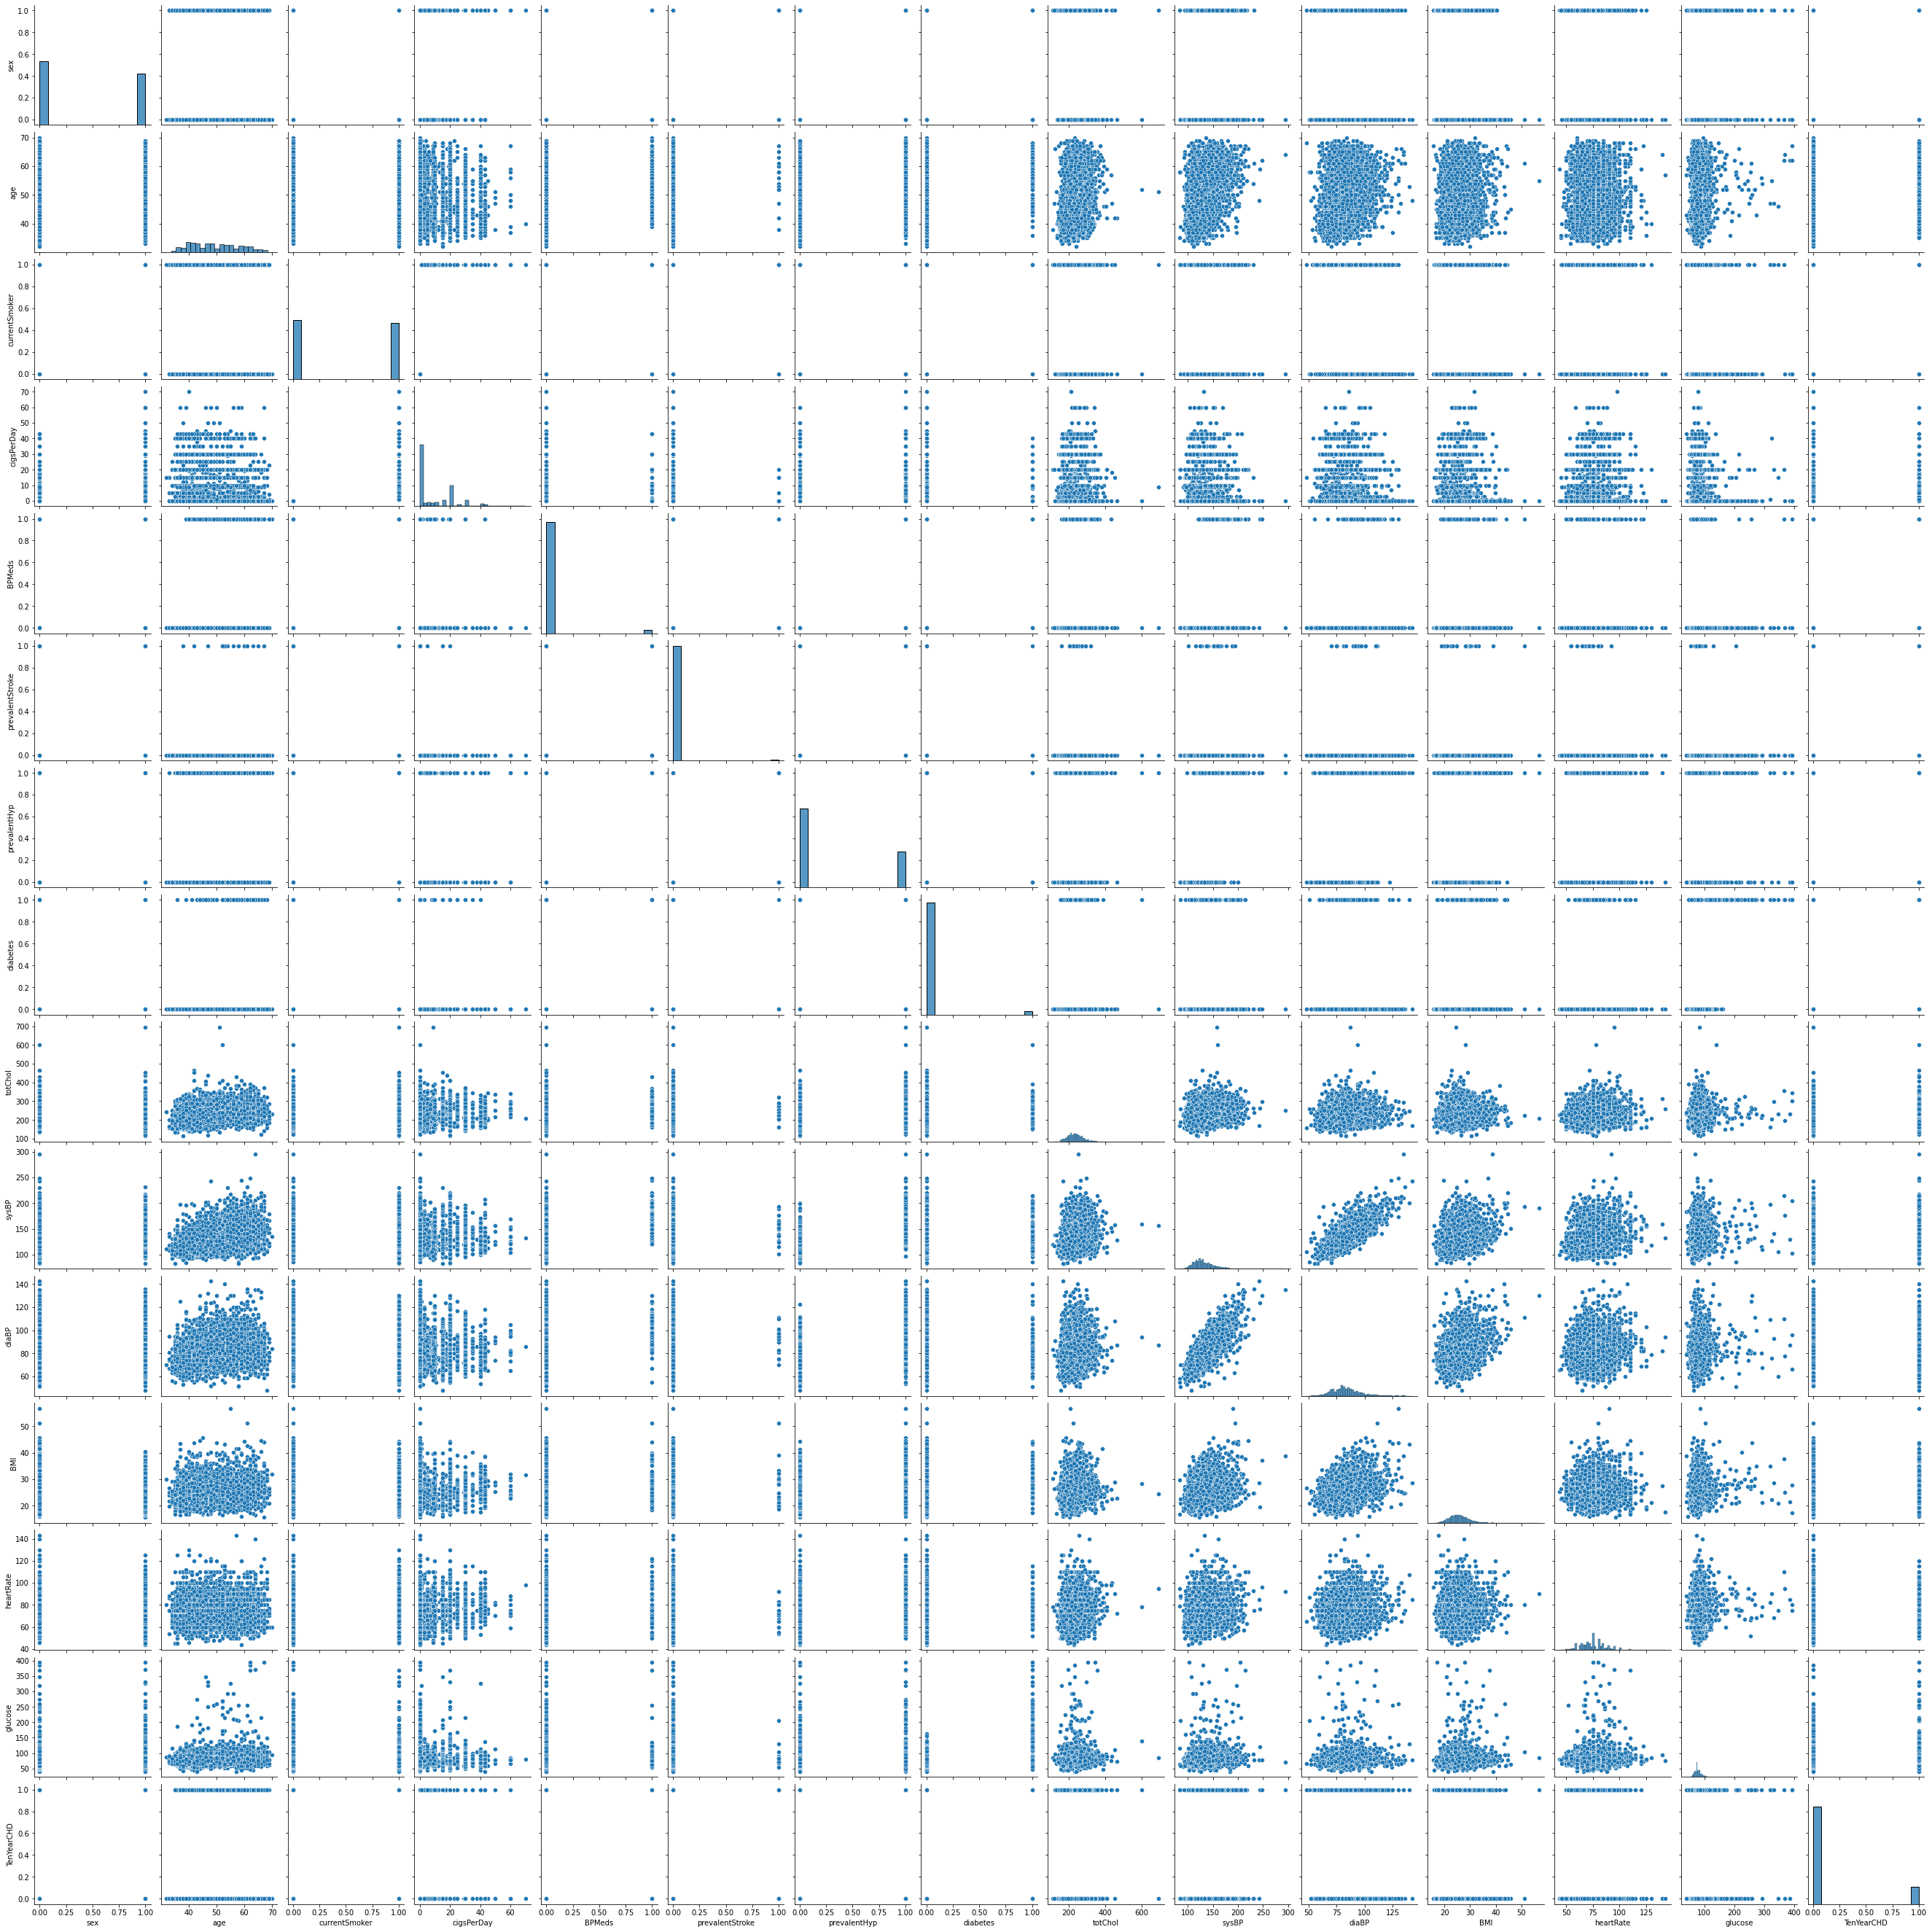

In [30]:
# Verificando os outliers
sns.pairplot(df_pacientes)

<AxesSubplot:xlabel='totChol'>

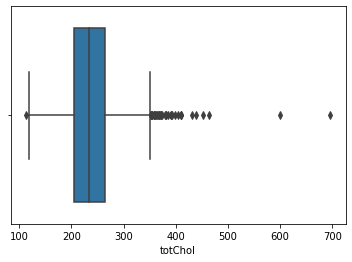

In [31]:
# Visualizando os outliers da variável totChol
sns.boxplot(df_pacientes.totChol)

In [32]:
# Obs: Nível total de colesterol acima de 240 já é ruim
outliers_totChol = df_pacientes[(df_pacientes['totChol'] > 500)] 
outliers_totChol

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


<AxesSubplot:>

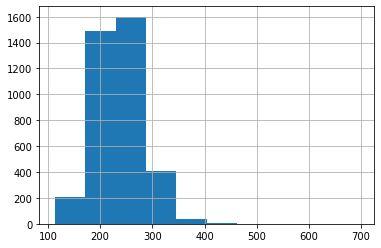

In [33]:
# Histograma da variável totChol antes da limpeza
df_pacientes.totChol.hist()

<AxesSubplot:xlabel='totChol'>

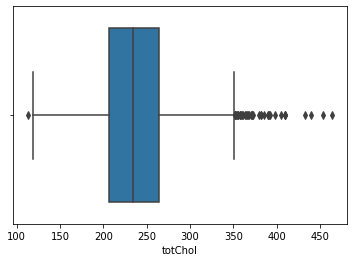

In [34]:
# Removendo os outliers
df_pacientes = df_pacientes.drop(df_pacientes[df_pacientes.totChol > 500].index)
sns.boxplot(df_pacientes.totChol)

<AxesSubplot:>

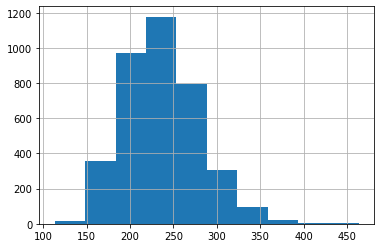

In [35]:
# Histograma da variável totChol depois da limpeza
df_pacientes.totChol.hist()

<AxesSubplot:xlabel='glucose'>

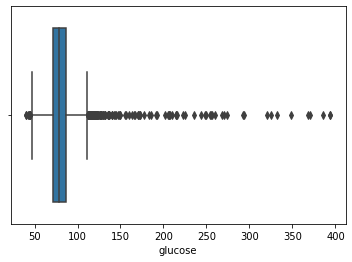

In [36]:
# Visualizando os outliers da variável glucose
sns.boxplot(df_pacientes.glucose)

In [37]:
# Obs: Valores de nível de glicose acima de 100 mg/dl, em jejum, já podem ser prejudiciais. 
# A relação tempo e dano é muito individual. 
outliers_glucose = df_pacientes[(df_pacientes['glucose'] > 300)] 
outliers_glucose

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1363,1,55,1,40.0,0.0,0,0,1,205.0,127.0,76.0,22.24,90.0,325.0,1
2406,0,62,0,0.0,0.0,0,0,1,233.0,130.0,87.0,21.34,85.0,386.0,0
2801,0,47,1,1.0,0.0,0,1,1,160.0,197.0,109.0,34.91,82.0,320.0,1
2893,1,62,0,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1
2909,0,67,0,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
3817,1,47,1,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0,1
3844,0,62,1,20.0,1.0,0,1,1,358.0,215.0,110.0,37.62,110.0,368.0,1
3849,0,46,1,15.0,0.0,0,0,1,233.0,106.0,60.0,20.84,75.0,348.0,0
3971,1,64,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0,0


<AxesSubplot:>

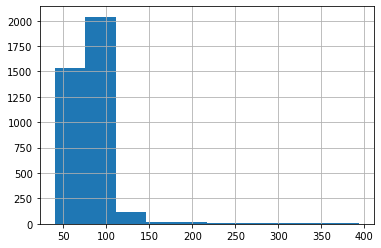

In [38]:
# Histograma da variável glucose antes da limpeza
df_pacientes.glucose.hist()

<AxesSubplot:xlabel='glucose'>

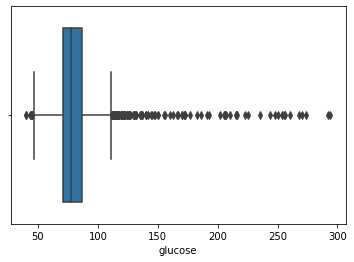

In [39]:
# Vamos remover os outliers
df_pacientes = df_pacientes.drop(df_pacientes[df_pacientes.glucose > 300].index)
sns.boxplot(df_pacientes.glucose)

<AxesSubplot:>

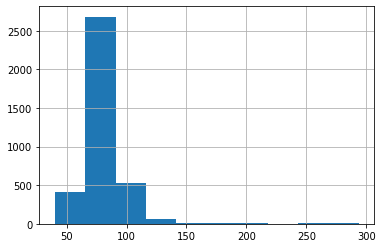

In [40]:
# Histograma da variável glucose depois da limpeza
df_pacientes.glucose.hist()

In [41]:
df_pacientes.describe()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000
mean,0.445187,49.554813,0.488235,9.006952,0.029947,0.005615,0.310963,0.024599,236.655615,132.299198,82.926738,25.807166,75.677273,81.195455,0.151070
std,0.497053,8.566586,0.499928,11.923486,0.170463,0.074732,0.462949,0.154920,43.506528,21.950778,11.919976,4.059254,11.947817,19.572361,0.358165
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,143.500000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,295.000000,142.500000,56.800000,143.000000,294.000000,1.000000


In [42]:
# Verificando se a variável resposta está balanceada
target_count = df_pacientes.TenYearCHD.value_counts()
target_count

0    3175
1     565
Name: TenYearCHD, dtype: int64

In [43]:
print('Classe 0:', target_count[0])
print('Classe 1:', target_count[1])
print('Proporção:', round(target_count[0] / target_count[1], 2), ': 1')

Classe 0: 3175
Classe 1: 565
Proporção: 5.62 : 1


Podemos ver que a proporção é de 5,62: 1, que não está bem equilibrada. Um dos principais problemas ao lidar com conjuntos de dados desequilibrados refere-se às métricas usadas para avaliar um modelo. O uso de métricas mais simples, como precision_score, pode ser enganoso. Em um conjunto de dados com classes altamente desequilibradas, se o classificador sempre "predizer" a classe mais comum sem realizar nenhuma análise dos recursos, ele ainda terá uma alta taxa de precisão, obviamente ilusória.

### 2.3 - Pré-Processamento dos Dados - Reamostragem de Dados Desequilibrados

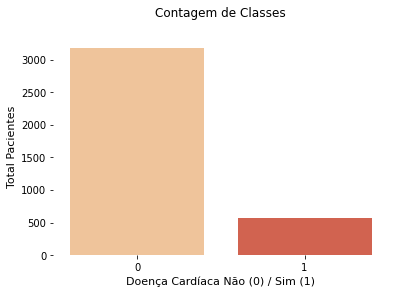

In [44]:
# Plot 
sns.countplot(df_pacientes.TenYearCHD, palette = "OrRd")
plt.box(False)
plt.xlabel('Doença Cardíaca Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [45]:
# Dataset
df_pacientes.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [46]:
# Variáveis Explicativas
df_pacientes.iloc[:, 0:14]  

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [47]:
# Variável Target
df_pacientes.iloc[:, -1] 

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3740, dtype: int64

### 2.4 - SMOTE (Synthetic Minority Oversampling Technique)

In [48]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = df_pacientes.iloc[:, 0:14]  
y = df_pacientes.iloc[:, -1] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

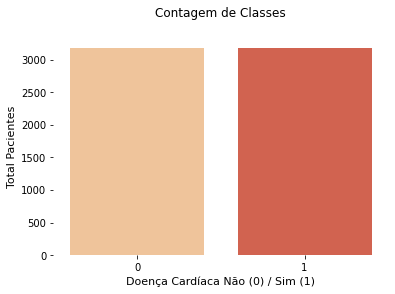

In [49]:
# Plot
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Doença Cardíaca Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [50]:
# Confere o shape
X_res.shape

(6350, 14)

In [51]:
# Confere o shape
y_res.shape

(6350,)

In [52]:
# Vamos adicionar uma coluna com o valor constante 1 para todas as linhas. 
# Isso é necessário para criar o modelo logit com o StatsModels.

X_final = add_constant(X_res)
X_final.head()

,const,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [53]:
# Não temos mais transformações para y, geramos o dataset final
y_final = y_res
y_final.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

## 03 - CONSTRUINDO O MODELO DE REGRESSÃO LOGÍSTICA

### 3.1 - StatsModels

#### Versão 1 - Regressão Logística com StatsModels

In [54]:
# Criando a primeira versão modelo de Regressão Logística com StatsModels

# Separa X e y
X = X_final
y = y_final

# Cria o objeto
logit_obj_v1 = sm.Logit(y, X)

# Cria o modelo
logit_modelo_v1 = logit_obj_v1.fit()

# Print do resultado
print(logit_modelo_v1.summary())

Optimization terminated successfully.
         Current function value: 0.594144
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6335
Method:                           MLE   Df Model:                           14
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.1428
Time:                        15:09:13   Log-Likelihood:                -3772.8
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                8.137e-260
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4026      0.426    -19.723      0.000      -9.238      -7.568
sex           

In [55]:
# Avaliando a precisão do modelo

# Confusion Matrix do Modelo
logit_modelo_v1.pred_table()

array([[2134., 1041.],
       [ 947., 2228.]])

In [56]:
# Imprimindo 10 previsões do modelo
predictions_v1 = logit_modelo_v1.predict()
print(predictions_v1[0:10])

[0.12909687 0.3202055  0.40203042 0.87043922 0.51991106 0.55552858
 0.74810419 0.28535018 0.37326215 0.55990718]


In [57]:
# Defininido um limite para a classificação
y_pred_v1 = [0 if x < 0.5 else 1 for x in predictions_v1]

In [58]:
# Relatório de Classificação
print(classification_report(y, y_pred_v1))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      3175
           1       0.68      0.70      0.69      3175

    accuracy                           0.69      6350
   macro avg       0.69      0.69      0.69      6350
weighted avg       0.69      0.69      0.69      6350



Será que se normalizamos os dados melhoramos o resultado?

In [59]:
X_final.head()

,const,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [60]:
X_final.iloc[:,1:15]

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000
1,0,46,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000
2,1,48,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000
3,0,61,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000
4,0,46,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,0,60,0,0.000000,0.000000,0,1,0,208.711727,147.024841,80.889659,30.857735,73.398613,65.466204
6346,0,61,0,0.000000,0.676851,0,1,0,271.938895,179.923618,95.000000,27.523091,67.816684,118.799061
6347,1,55,1,20.000000,0.000000,0,0,0,219.672480,127.689921,78.397282,24.646548,73.637599,78.362401
6348,0,52,0,6.016220,0.000000,0,0,0,248.027033,126.679282,81.000000,22.766810,69.005407,131.282871


In [61]:
# Cria o objeto scaler
scaler = MinMaxScaler(feature_range = (0,1)) 

# Normalizando as variáveis explicativas (não normalizamos a constante e nem a variável target)
X_final_scaled = pd.DataFrame(scaler.fit_transform(X_final.iloc[:,1:15]), columns = X_final.iloc[:,1:15].columns)

In [62]:
X_final_scaled.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.233618,0.106383,0.232804,0.277024,0.363636,0.145669
1,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.390313,0.177305,0.349206,0.319680,0.515152,0.141732
2,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.376068,0.208038,0.338624,0.237518,0.313131,0.118110
3,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.319088,0.314421,0.497354,0.316045,0.212121,0.248031
4,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.490028,0.219858,0.380952,0.183228,0.414141,0.177165


In [63]:
# Vamos adicionar uma coluna com o valor constante 1 para todas as linhas. 
# Isso é necessário para criar o modelo logit com o StatsModels.
X_final_scaled = add_constant(X_final_scaled)
X_final_scaled.head()

,const,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.233618,0.106383,0.232804,0.277024,0.363636,0.145669
1,1.0,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.390313,0.177305,0.349206,0.319680,0.515152,0.141732
2,1.0,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.376068,0.208038,0.338624,0.237518,0.313131,0.118110
3,1.0,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.319088,0.314421,0.497354,0.316045,0.212121,0.248031
4,1.0,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.490028,0.219858,0.380952,0.183228,0.414141,0.177165


#### Versão 2 - Regressão Logística com StatsModels

In [64]:
# Criando a segunda versão modelo de Regressão Logística com StatsModels

# Separa X e y
X = X_final_scaled
y = y_final

# Cria o objeto
logit_obj_v2 = sm.Logit(y, X)

# Cria o modelo
logit_modelo_v2 = logit_obj_v2.fit()

# Print do resultado
print(logit_modelo_v2.summary())

Optimization terminated successfully.
         Current function value: 0.594144
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6335
Method:                           MLE   Df Model:                           14
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.1428
Time:                        15:09:14   Log-Likelihood:                -3772.8
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                8.137e-260
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.3381      0.184    -18.159      0.000      -3.698      -2.978
sex           

In [65]:
# Confusion Matrix do Modelo
logit_modelo_v2.pred_table()

array([[2134., 1041.],
       [ 947., 2228.]])

In [66]:
# Imprimindo 10 previsões do modelo
predictions_v2 = logit_modelo_v2.predict()
print(predictions_v2[0:10])

[0.12909687 0.3202055  0.40203042 0.87043922 0.51991106 0.55552858
 0.74810419 0.28535018 0.37326215 0.55990718]


In [67]:
# Defininido um limite para a classificação
y_pred_v2 = [0 if x < 0.5 else 1 for x in predictions_v2]

In [68]:
# Relatório de Classificação
print(classification_report(y, y_pred_v2))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      3175
           1       0.68      0.70      0.69      3175

    accuracy                           0.69      6350
   macro avg       0.69      0.69      0.69      6350
weighted avg       0.69      0.69      0.69      6350



##### Seleção de Atributos (Feature Selection)

In [69]:
# Identificando os atributos de maior importância para a variável de resultado

# Separando as variáveis explicativas da variável resposta (não adicionamos a constante)
X = X_final.iloc[:,1:15]
y = y_final

# Aplicando SelectKBest para extrair os melhores recursos
bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(X,y)

# Retorna os scores e as colunas
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenando os dois resultados anteriores para melhor visualização
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Atributos','Score']  

# Imprime os 10 melhores atributos em ordem descrescente
print(featureScores.nlargest(14, 'Score')) 

          Atributos        Score
9             sysBP  2030.203811
1               age   863.156342
8           totChol   697.061111
13          glucose   485.945099
10            diaBP   481.991015
3        cigsPerDay   306.591360
6      prevalentHyp    96.980180
4            BPMeds    54.862007
11              BMI    53.000455
2     currentSmoker    20.162725
7          diabetes     8.000000
12        heartRate     4.581821
0               sex     4.251832
5   prevalentStroke     1.190476


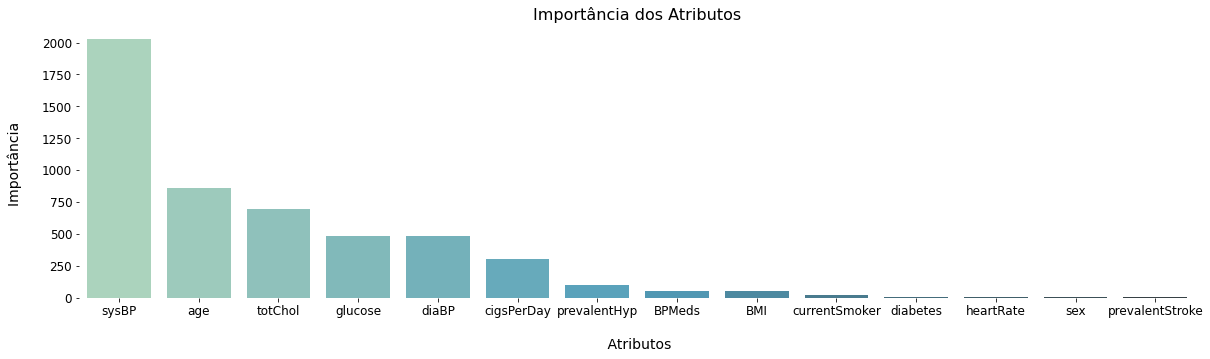

In [70]:
# Visualizando os atributos mais importantes

# Vamos colocar os scores em uma tabela e então criar um gráfico
featureScores = featureScores.sort_values(by = 'Score', ascending = False)
featureScores

# Plot
plt.figure(figsize = (20,5))
sns.barplot(x = 'Atributos', y = 'Score', data = featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Importância dos Atributos', fontsize = 16)
plt.xlabel('\n Atributos', fontsize = 14)
plt.ylabel('Importância \n', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [71]:
# Selecionando os 9 atributos com maior impacto para compreender a variável resposta
features_list = featureScores["Atributos"].tolist()[:9]
features_list

['sysBP',
 'age',
 'totChol',
 'glucose',
 'diaBP',
 'cigsPerDay',
 'prevalentHyp',
 'BPMeds',
 'BMI']

Manteremos apenas os recursos que têm o relacionamento mais forte com a variável de saída. Esses recursos são:

In [72]:
# Criando um dataframe com os atributos de maior importância
# Removemos as 2 variáveis categóricas com base na análise de associação feita anteriormente.
X_final_importance = X_final[['sysBP', 
                              'age', 
                              'totChol', 
                              'diaBP', 
                              'cigsPerDay', 
                              'glucose', 
                              'BMI']]

# Adiciona a constante
X_final_importance = add_constant(X_final_importance)
X_final_importance.head()

,const,sysBP,age,totChol,diaBP,cigsPerDay,glucose,BMI
0,1.0,106.0,39,195.0,70.0,0.0,77.0,26.97
1,1.0,121.0,46,250.0,81.0,0.0,76.0,28.73
2,1.0,127.5,48,245.0,80.0,20.0,70.0,25.34
3,1.0,150.0,61,225.0,95.0,30.0,103.0,28.58
4,1.0,130.0,46,285.0,84.0,23.0,85.0,23.10


#### Versão 3 - Regressão Logística com StatsModels

In [73]:
# Criando a terceira versão modelo de Regressão Logística com StatsModels

# Separa X e y
X = X_final_importance
y = y_final

# Cria o objeto
logit_obj_v3 = sm.Logit(y, X)

# Cria o modelo
logit_modelo_v3 = logit_obj_v3.fit()

# Print do resultado
print(logit_modelo_v3.summary())

Optimization terminated successfully.
         Current function value: 0.609537
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6342
Method:                           MLE   Df Model:                            7
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.1206
Time:                        15:09:15   Log-Likelihood:                -3870.6
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                5.207e-225
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0678      0.332    -24.290      0.000      -8.719      -7.417
sysBP          0.0139      0.

In [74]:
# Confusion Matrix do Modelo
logit_modelo_v3.pred_table()

array([[2092., 1083.],
       [1002., 2173.]])

In [75]:
# Imprimindo 10 previsões do modelo
predictions_v3 = logit_modelo_v3.predict()
print(predictions_v3[0:10])

[0.13902236 0.28993488 0.44759071 0.84756541 0.47739263 0.50174875
 0.65700834 0.31711929 0.47046385 0.59258747]


In [76]:
# Defininido um limite para a classificação
y_pred_v3 = [0 if x < 0.5 else 1 for x in predictions_v3]

In [77]:
# Relatório de Classificação
print(classification_report(y, y_pred_v3))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3175
           1       0.67      0.68      0.68      3175

    accuracy                           0.67      6350
   macro avg       0.67      0.67      0.67      6350
weighted avg       0.67      0.67      0.67      6350



Vamos normalizar as variáveis usadas na versão 3 do modelo e criar a versão 4.

##### Normalização

In [78]:
X_final_importance.head()

,const,sysBP,age,totChol,diaBP,cigsPerDay,glucose,BMI
0,1.0,106.0,39,195.0,70.0,0.0,77.0,26.97
1,1.0,121.0,46,250.0,81.0,0.0,76.0,28.73
2,1.0,127.5,48,245.0,80.0,20.0,70.0,25.34
3,1.0,150.0,61,225.0,95.0,30.0,103.0,28.58
4,1.0,130.0,46,285.0,84.0,23.0,85.0,23.10


In [79]:
X_final_importance.iloc[:,1:11]

,sysBP,age,totChol,diaBP,cigsPerDay,glucose,BMI
0,106.000000,39,195.000000,70.000000,0.000000,77.000000,26.970000
1,121.000000,46,250.000000,81.000000,0.000000,76.000000,28.730000
2,127.500000,48,245.000000,80.000000,20.000000,70.000000,25.340000
3,150.000000,61,225.000000,95.000000,30.000000,103.000000,28.580000
4,130.000000,46,285.000000,84.000000,23.000000,85.000000,23.100000
...,...,...,...,...,...,...,...
6345,147.024841,60,208.711727,80.889659,0.000000,65.466204,30.857735
6346,179.923618,61,271.938895,95.000000,0.000000,118.799061,27.523091
6347,127.689921,55,219.672480,78.397282,20.000000,78.362401,24.646548
6348,126.679282,52,248.027033,81.000000,6.016220,131.282871,22.766810


In [80]:
# Cria o objeto scaler
scaler = MinMaxScaler(feature_range = (0,1)) 

# Normalizando as variáveis explicativas (não normalizamos a constante e nem a variável target)
X_final_scaled_v2 = pd.DataFrame(scaler.fit_transform(X_final_importance.iloc[:,1:11]), 
                                 columns = X_final_importance.iloc[:,1:11].columns)

# Adiciona a constante
X_final_scaled_v2 = add_constant(X_final_scaled_v2)
X_final_scaled_v2.head()

,const,sysBP,age,totChol,diaBP,cigsPerDay,glucose,BMI
0,1.0,0.106383,0.184211,0.233618,0.232804,0.000000,0.145669,0.277024
1,1.0,0.177305,0.368421,0.390313,0.349206,0.000000,0.141732,0.319680
2,1.0,0.208038,0.421053,0.376068,0.338624,0.285714,0.118110,0.237518
3,1.0,0.314421,0.763158,0.319088,0.497354,0.428571,0.248031,0.316045
4,1.0,0.219858,0.368421,0.490028,0.380952,0.328571,0.177165,0.183228


#### Versão 4 - Regressão Logística com StatsModels

In [81]:
# Criando a quarta versão modelo de Regressão Logística com StatsModels

# Separa X e y
X = X_final_scaled_v2
y = y_final

# Cria o objeto
logit_obj_v4 = sm.Logit(y, X)

# Cria o modelo
logit_modelo_v4 = logit_obj_v4.fit()

# Print do resultado
print(logit_modelo_v4.summary())

Optimization terminated successfully.
         Current function value: 0.609537
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6342
Method:                           MLE   Df Model:                            7
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.1206
Time:                        15:09:15   Log-Likelihood:                -3870.6
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                5.207e-225
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4195      0.154    -22.246      0.000      -3.721      -3.118
sysBP          2.9403      0.

##### Feature Selection: Backward Elimination (P-value Approach)

In [82]:
# Lista com o nome das variáveis explicativas
cols_names = X.columns
cols_names

Index(['const', 'sysBP', 'age', 'totChol', 'diaBP', 'cigsPerDay', 'glucose',
       'BMI'],
      dtype='object')

In [83]:
# Função
def back_feature_elem (x, y, col_list):

    while len(col_list) > 0 :
        modelo = sm.Logit(y, x[col_list])
        result = modelo.fit()
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

#### Versão 5 - Regressão Logística com StatsModels

In [84]:
# Quinta versão do modelo

# Separa X e y
X = X_final_importance
y = y_final

# Cria o modelo sem os atributos com maior valor-p
logit_modelo_v5 = back_feature_elem(X, y, cols_names)

Optimization terminated successfully.
         Current function value: 0.609537
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609692
         Iterations 5


In [85]:
# Print do resultado
print(logit_modelo_v5.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.1204
Time:                        15:09:15   Log-Likelihood:                -3871.5
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                9.962e-226
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9146      0.313    -25.307      0.000      -8.528      -7.302
sysBP          0.0163      0.001     11.815      0.000       0.014       0.019
age            0.0748      0.004     19.298      0.0

In [86]:
# Confusion Matrix do Modelo
logit_modelo_v5.pred_table()

array([[2101., 1074.],
       [1018., 2157.]])

In [87]:
# Imprimindo 10 previsões do modelo
predictions_v5 = logit_modelo_v5.predict()
print(predictions_v5[0:10])

[0.14245944 0.28973177 0.44940154 0.84293327 0.47378588 0.49845271
 0.67540673 0.31355359 0.4679984  0.57821975]


In [88]:
# Defininido um limite para a classificação
y_pred_v5 = [0 if x < 0.5 else 1 for x in predictions_v5]

In [89]:
# Relatório de Classificação
print(classification_report(y, y_pred_v5))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      3175
           1       0.67      0.68      0.67      3175

    accuracy                           0.67      6350
   macro avg       0.67      0.67      0.67      6350
weighted avg       0.67      0.67      0.67      6350



### 3.2 - GLM

#### Versão 1 - Modelo GLM

In [90]:
# Primeira versão do modelo GLM
modelo_v1 = sm.GLM(y, X, family = sm.families.Binomial())
glm_modelo_v1 = modelo_v1.fit()

In [91]:
glm_modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3870.6
Date:                Wed, 22 Sep 2021   Deviance:                       7741.1
Time:                        15:09:15   Pearson chi2:                 6.37e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0678      0.332    -24.290      0.000      -8.719      -7.417
sysBP          0.0139      0.002      6.323      0.000       0.010       0.018
age            0.0762      0.004     19.054      0.000       0.068       0.084
totChol        0.0018      0.001      2.752      0.006       0.001       0.003
diaBP          0.0055      0.004      1.401      0.161      -0.002       0.013
cigsPerDay     0.0283      0.002     11.576      0.000       0.024       0.033
glucose        0.0069      0.001      5.456      0.000       0.004       0.009
BMI            0.0199      0.008      2.537      0.011       0.005       0.035
==============================================================================
"""

In [92]:
# Previsões do modelo
predictions_glm1 = glm_modelo_v1.predict()
print(predictions_glm1[0:10])

[0.13902236 0.28993488 0.44759071 0.84756541 0.47739263 0.50174875
 0.65700834 0.31711929 0.47046385 0.59258747]


In [93]:
y_pred_glm1 = [0 if x < 0.5 else 1 for x in predictions_glm1]

In [94]:
# Relatório de Classificação
print(classification_report(y, y_pred_glm1))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      3175
           1       0.67      0.68      0.68      3175

    accuracy                           0.67      6350
   macro avg       0.67      0.67      0.67      6350
weighted avg       0.67      0.67      0.67      6350



In [95]:
# Removendo a coluna diaBP
X = X.drop(['diaBP'], axis = 1)

#### Versão 2 - Modelo GLM

In [96]:
# Segunda versão do modelo GLM
modelo_v2 = sm.GLM(y, X, family = sm.families.Binomial())
glm_modelo_v2 = modelo_v2.fit()

In [97]:
glm_modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3871.5
Date:                Wed, 22 Sep 2021   Deviance:                       7743.1
Time:                        15:09:16   Pearson chi2:                 6.38e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9146      0.313    -25.307      0.000      -8.528      -7.302
sysBP          0.0163      0.001     11.815      0.000       0.014       0.019
age            0.0748      0.004     19.298      0.000       0.067       0.082
totChol        0.0018      0.001      2.737      0.006       0.001       0.003
cigsPerDay     0.0282      0.002     11.540      0.000       0.023       0.033
glucose        0.0068      0.001      5.365      0.000       0.004       0.009
BMI            0.0224      0.008      2.937      0.003       0.007       0.037
==============================================================================
"""

In [98]:
# Previsões do modelo
predictions_glm2 = glm_modelo_v2.predict()
print(predictions_glm2[0:10])

[0.14245944 0.28973177 0.44940154 0.84293327 0.47378588 0.49845271
 0.67540673 0.31355359 0.4679984  0.57821975]


In [99]:
# Definindo o limite
y_pred_glm2 = [0 if x < 0.5 else 1 for x in predictions_glm2]

In [100]:
# Relatório de Classificação
print(classification_report(y, y_pred_glm2))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      3175
           1       0.67      0.68      0.67      3175

    accuracy                           0.67      6350
   macro avg       0.67      0.67      0.67      6350
weighted avg       0.67      0.67      0.67      6350



## 04 - INTERPRETAÇÃO DOS RESULTADOS

- Extrair os parâmetros e mostrar em formato de tabela;

- Calcular o exponencial de cada um dos coeficientes para gerar os índices de chances (Odds Ratio). 

Isso mostrará como um aumento ou diminuição de 1 unidade em uma variável afeta as chances de desenvolver a doença. 

In [101]:
# Print do resultado do modelo_v5 (nossa escolha)
print(logit_modelo_v5.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 6350
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.1204
Time:                        15:09:16   Log-Likelihood:                -3871.5
converged:                       True   LL-Null:                       -4401.5
Covariance Type:            nonrobust   LLR p-value:                9.962e-226
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.9146      0.313    -25.307      0.000      -8.528      -7.302
sysBP          0.0163      0.001     11.815      0.000       0.014       0.019
age            0.0748      0.004     19.298      0.0

In [102]:
logit_modelo_v5.params

const        -7.914578
sysBP         0.016311
age           0.074848
totChol       0.001766
cigsPerDay    0.028168
glucose       0.006801
BMI           0.022374
dtype: float64

In [103]:
np.exp(logit_modelo_v5.params)

const         0.000365
sysBP         1.016445
age           1.077721
totChol       1.001768
cigsPerDay    1.028569
glucose       1.006824
BMI           1.022626
dtype: float64

In [104]:
logit_modelo_v5.conf_int()

,0,1
const,-8.527550,-7.301605
sysBP,0.013605,0.019017
age,0.067246,0.082450
totChol,0.000501,0.003031
cigsPerDay,0.023384,0.032952
glucose,0.004316,0.009286
BMI,0.007441,0.037306


In [105]:
np.exp(logit_modelo_v5.conf_int())

,0,1
const,0.000198,0.000674
sysBP,1.013698,1.019199
age,1.069559,1.085944
totChol,1.000502,1.003036
cigsPerDay,1.023660,1.033501
glucose,1.004326,1.009329
BMI,1.007469,1.038010


In [106]:
logit_modelo_v5.pvalues

const         2.697817e-141
sysBP          3.270149e-32
age            5.618130e-83
totChol        6.202184e-03
cigsPerDay     8.251657e-31
glucose        8.111439e-08
BMI            3.317408e-03
dtype: float64

In [107]:
# Extrai os parâmetros e intervalos de confiança
params = np.exp(logit_modelo_v5.params)
conf = np.exp(logit_modelo_v5.conf_int())
conf['OR'] = params

# Extra os valores-p
pvalue = round(logit_modelo_v5.pvalues, 3)
conf['Valor-p'] = pvalue

# Imprime os resultados
conf.columns = ['IC 95%(2.5%)', 'IC 95%(97.5%)', 'Odds Ratio', 'Valor-p']
print((conf))

            IC 95%(2.5%)  IC 95%(97.5%)  Odds Ratio  Valor-p
const           0.000198       0.000674    0.000365    0.000
sysBP           1.013698       1.019199    1.016445    0.000
age             1.069559       1.085944    1.077721    0.000
totChol         1.000502       1.003036    1.001768    0.006
cigsPerDay      1.023660       1.033501    1.028569    0.000
glucose         1.004326       1.009329    1.006824    0.000
BMI             1.007469       1.038010    1.022626    0.003


## 05 - CONCLUSÃO

O coeficiente para a idade (age) diz que, mantendo todos os outros constantes, veremos um aumento de 8% nas chances de ser diagnosticado com doença cardíaca em um período de 10 anos, para um aumento de um ano na idade pois: 

**exp (0.074848) = 1.077721.**


Da mesma forma, com cada cigarro extra que se fuma, há um aumento de 3% nas chances de ser diagnosticado com doença cardíaca em um período de 10 anos.


Há um aumento de 1,6% nas chances de ser diagnosticado com doença cardíaca em um período de 10 anos para cada aumento unitário da pressão arterial sistólica.


Há um aumento de 2,2% nas chances de ser diagnosticado com doença cardíaca em um período de 10 anos para cada aumento unitário do índice de massa corporal.


Para o nível total de colesterol e glicose, não há alterações significativas.

# FIM